In [80]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [81]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [82]:
df = pd.read_excel('Customer Churn Data.xlsx','Data for DSBA')
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [83]:
pd.options.display.max_columns = None


In [84]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [85]:
## Checking the shape of the data: Number of columns and rows

df.shape

(11260, 19)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [87]:
df.describe(include='all')

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11260.00000,11260.000000,11158.0,11148.000000,11158.000000,11151,11152,11162.000000,11148.0,11163,11144.000000,11048,11158.0,10903.000000,11260.0,11260.0,10903.0,10789.00,11039
unique,NaN,NaN,38.0,NaN,NaN,5,4,NaN,7.0,7,NaN,3,59.0,NaN,20.0,20.0,24.0,5693.00,3
top,NaN,NaN,1.0,NaN,NaN,Debit Card,Male,NaN,4.0,Super,NaN,Married,3.0,NaN,14.0,1.0,3.0,155.62,Mobile
freq,NaN,NaN,1351.0,NaN,NaN,4587,6328,NaN,4569.0,4062,NaN,5860,1746.0,NaN,1524.0,4373.0,1816.0,10.00,7482
mean,25629.50000,0.168384,NaN,1.653929,17.867091,NaN,NaN,2.902526,NaN,NaN,3.066493,NaN,NaN,0.285334,NaN,NaN,NaN,NaN,NaN
std,3250.62635,0.374223,NaN,0.915015,8.853269,NaN,NaN,0.725584,NaN,NaN,1.379772,NaN,NaN,0.451594,NaN,NaN,NaN,NaN,NaN
min,20000.00000,0.000000,NaN,1.000000,4.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,22814.75000,0.000000,NaN,1.000000,11.000000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,25629.50000,0.000000,NaN,1.000000,16.000000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,28444.25000,0.000000,NaN,3.000000,23.000000,NaN,NaN,3.000000,NaN,NaN,4.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


In [88]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

cashback                471
Complain_ly             357
Day_Since_CC_connect    357
Login_device            221
Marital_Status          212
CC_Agent_Score          116
City_Tier               112
Account_user_count      112
Payment                 109
Gender                  108
Tenure                  102
CC_Contacted_LY         102
rev_per_month           102
Service_Score            98
account_segment          97
dtype: int64

In [89]:
df['Tenure'].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

Tenure has "#'symbol present at few instances that need to be replaced with values

In [90]:
df['Tenure'].replace('#',np.nan,inplace=True)
df['Tenure'].dtype

dtype('float64')

In [91]:
df['Tenure'].unique()

array([ 4.,  0.,  2., 13., 11., nan,  9., 99., 19., 20., 14.,  8., 26.,
       18.,  5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16.,
       10., 15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

In [92]:
df['cashback']
df['cashback'].replace('$',np.nan,inplace=True)


In [93]:
df['cashback'].dtype

dtype('float64')

cashback has "$'symbol present at few instances that need to be replaced with values

In [94]:
df['Complain_ly'].unique()

array([ 1.,  0., nan])

In [95]:
df['Day_Since_CC_connect'].unique()



array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

Day_Since_CC_connect has "$'symbol present at few instances that need to be replaced with values

In [96]:
df['Day_Since_CC_connect'].replace('$',np.nan,inplace=True)


In [97]:
df['Day_Since_CC_connect'].dtype

dtype('float64')

In [98]:
df['Payment'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [99]:
df['Gender'].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In Gender, Female has to be replaced with "F" and male has to be replaced with "M". Also, we have to impute the null value using mode

In [100]:
df['Gender'].replace('Female','F',inplace=True)
df['Gender'].replace('Male','M',inplace=True)
df['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [101]:
df['Account_user_count'].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

Account_user_count has "@" symbol present at few instances that need to be replaced with values

In [102]:
df['Account_user_count'].replace('@',np.nan,inplace=True)
df['Day_Since_CC_connect'].dtype

dtype('float64')

In [103]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

account_segment is a categorical variable but has to be imputed

In [104]:
df['Marital_Status'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

Marital_Status is a categorical variable but has to be imputed

In [105]:
df['rev_per_month'].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

rev_per_month has "+" symbol present at few instances that need to be replaced with values

In [106]:
df['rev_per_month'].replace('+',np.nan,inplace=True)
df['rev_per_month'].dtype

dtype('float64')

In [107]:
df['rev_growth_yoy'].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

rev_per_month has "$" symbol present at few instances that need to be replaced with values

In [108]:
df['rev_growth_yoy'].replace('$',np.nan,inplace=True)
df['rev_growth_yoy'].dtype

dtype('float64')

In [109]:
df['coupon_used_for_payment'].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

coupon_used_for_payment has the symbols '#','$,'*' present at few instances that need to be replaced with values

In [110]:
df['coupon_used_for_payment'].replace('#',np.nan,inplace=True)
df['coupon_used_for_payment'].replace('$',np.nan,inplace=True)
df['coupon_used_for_payment'].replace('*',np.nan,inplace=True)
df['coupon_used_for_payment'].dtype

dtype('float64')

In [111]:
df['Login_device'].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

Login_device has the symbol '&&&&' present at few instances that need to be replaced with values

In [112]:
df['Login_device'].replace('&&&&',np.nan,inplace=True)
df['Login_device'].dtype

dtype('O')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [114]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

rev_per_month              791
Login_device               760
cashback                   473
Account_user_count         444
Day_Since_CC_connect       358
Complain_ly                357
Tenure                     218
Marital_Status             212
CC_Agent_Score             116
City_Tier                  112
Payment                    109
Gender                     108
CC_Contacted_LY            102
Service_Score               98
account_segment             97
rev_growth_yoy               3
coupon_used_for_payment      3
dtype: int64

In [115]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

In [116]:
df_num

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,20000,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93
1,20001,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90
2,20002,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,NaN
3,20003,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07
4,20004,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10.0,1.0,34.0,3.0,2.0,1.0,9.0,0.0,19.0,1.0,4.0,153.71
11256,31256,0,13.0,1.0,19.0,3.0,5.0,5.0,7.0,0.0,16.0,1.0,8.0,226.91
11257,31257,0,1.0,1.0,14.0,3.0,2.0,4.0,7.0,1.0,22.0,1.0,4.0,191.42
11258,31258,0,23.0,3.0,11.0,4.0,5.0,4.0,7.0,0.0,16.0,2.0,9.0,179.90


In [117]:
df_cat

,Payment,Gender,account_segment,Marital_Status,Login_device
0,Debit Card,F,Super,Single,Mobile
1,UPI,M,Regular Plus,Single,Mobile
2,Debit Card,M,Regular Plus,Single,Mobile
3,Debit Card,M,Super,Single,Mobile
4,Credit Card,M,Regular Plus,Single,Mobile
...,...,...,...,...,...
11255,Credit Card,M,Super,Married,Computer
11256,Credit Card,M,HNI,Married,Mobile
11257,Debit Card,M,Super,Married,Mobile
11258,Credit Card,M,Super,Married,Computer


In [118]:
from sklearn.impute import SimpleImputer

In [119]:
imputer = SimpleImputer(missing_values = np.nan,strategy = 'median')
df_num = pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)

In [120]:
### Examine missing values for Numerical variables
df_na = df_num.isna().sum()
df_na

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Service_Score              0
Account_user_count         0
CC_Agent_Score             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
dtype: int64

In [121]:
imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
df_cat = pd.DataFrame(imputer.fit_transform(df_cat),columns=df_cat.columns)

In [122]:
### Examine missing values for Categorical variables
df_na = df_cat.isna().sum()
df_na

Payment            0
Gender             0
account_segment    0
Marital_Status     0
Login_device       0
dtype: int64

Concatenate the numerical and categorical dataframes

In [123]:
df_new = pd.concat([df_num,df_cat],axis=1,join='inner')
df_new

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment,Gender,account_segment,Marital_Status,Login_device
0,20000.0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93,Debit Card,F,Super,Single,Mobile
1,20001.0,1.0,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90,UPI,M,Regular Plus,Single,Mobile
2,20002.0,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,165.25,Debit Card,M,Regular Plus,Single,Mobile
3,20003.0,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07,Debit Card,M,Super,Single,Mobile
4,20004.0,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60,Credit Card,M,Regular Plus,Single,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255.0,0.0,10.0,1.0,34.0,3.0,2.0,1.0,9.0,0.0,19.0,1.0,4.0,153.71,Credit Card,M,Super,Married,Computer
11256,31256.0,0.0,13.0,1.0,19.0,3.0,5.0,5.0,7.0,0.0,16.0,1.0,8.0,226.91,Credit Card,M,HNI,Married,Mobile
11257,31257.0,0.0,1.0,1.0,14.0,3.0,2.0,4.0,7.0,1.0,22.0,1.0,4.0,191.42,Debit Card,M,Super,Married,Mobile
11258,31258.0,0.0,23.0,3.0,11.0,4.0,5.0,4.0,7.0,0.0,16.0,2.0,9.0,179.90,Credit Card,M,Super,Married,Computer


In [124]:
### Examine missing values for the imputed Data frame
df_na = df_new.isna().sum()
df_na

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Service_Score              0
Account_user_count         0
CC_Agent_Score             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Payment                    0
Gender                     0
account_segment            0
Marital_Status             0
Login_device               0
dtype: int64

In [125]:
df_new.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.00000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,25629.50000,0.168384,10.985879,1.647425,17.850178,2.903375,3.704973,3.065808,6.266874,0.276288,16.193073,1.790409,4.581261,194.934722
std,3250.62635,0.374223,12.757534,0.912763,8.814851,0.722476,1.004383,1.372663,11.488990,0.447181,3.757271,1.969331,3.649643,174.977865
min,20000.00000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,22814.75000,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.890000
50%,25629.50000,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,165.250000
75%,28444.25000,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.310000
max,31259.00000,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [126]:
df_new.drop(['AccountID'], axis = 1,inplace=True)

In [127]:
df_new.describe(include='all')

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment,Gender,account_segment,Marital_Status,Login_device
count,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260,11260,11260,11260,11260
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,7,3,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Debit Card,M,Super,Married,Mobile
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4696,6812,4159,6072,8242
mean,0.168384,10.985879,1.647425,17.850178,2.903375,3.704973,3.065808,6.266874,0.276288,16.193073,1.790409,4.581261,194.934722,NaN,NaN,NaN,NaN,NaN
std,0.374223,12.757534,0.912763,8.814851,0.722476,1.004383,1.372663,11.488990,0.447181,3.757271,1.969331,3.649643,174.977865,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.890000,NaN,NaN,NaN,NaN,NaN
50%,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,165.250000,NaN,NaN,NaN,NaN,NaN
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.310000,NaN,NaN,NaN,NaN,NaN


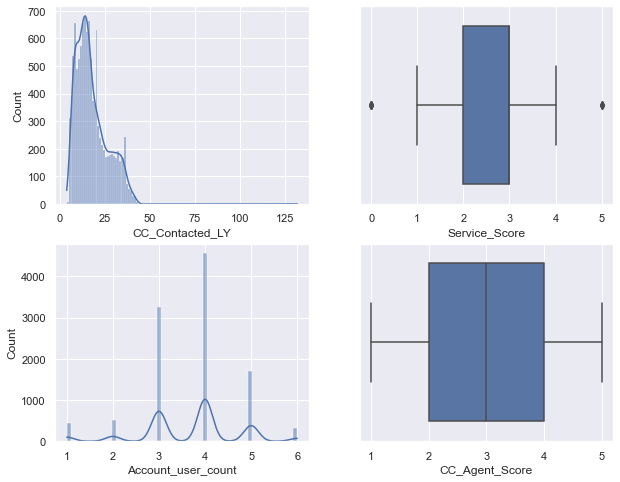

In [128]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['CC_Contacted_LY'], kde=True, ax=axes[0][0])
sns.boxplot(x='Service_Score', data=df, ax=axes[0][1])
sns.histplot(df['Account_user_count'] , kde=True, ax=axes[1][0])
sns.boxplot(x='CC_Agent_Score', data=df , ax=axes[1][1])
plt.show()

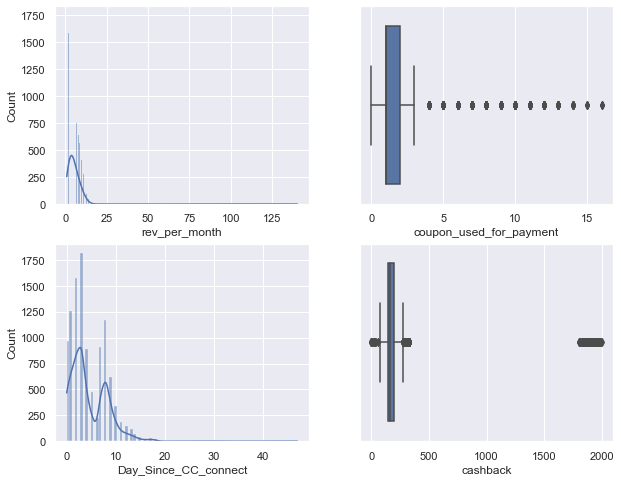

In [129]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['rev_per_month'], kde=True, ax=axes[0][0])
sns.boxplot(x='coupon_used_for_payment', data=df, ax=axes[0][1])
sns.histplot(df['Day_Since_CC_connect'] , kde=True, ax=axes[1][0])
sns.boxplot(x='cashback', data=df , ax=axes[1][1])
plt.show()

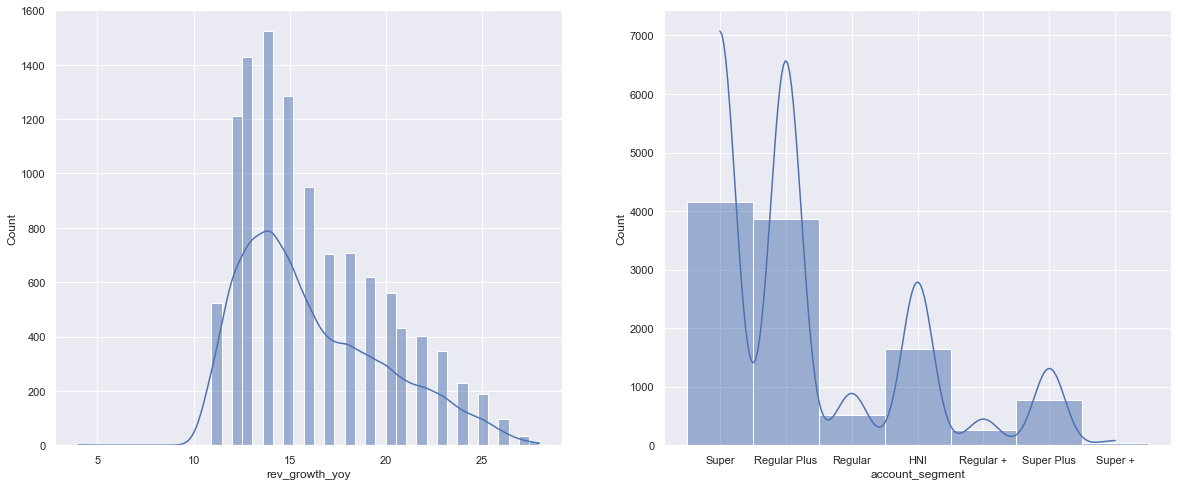

In [130]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,8)
sns.histplot(df_new['rev_growth_yoy'], kde=True, ax=axes[0])
sns.histplot(df_new['account_segment'], kde=True, ax=axes[1])
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

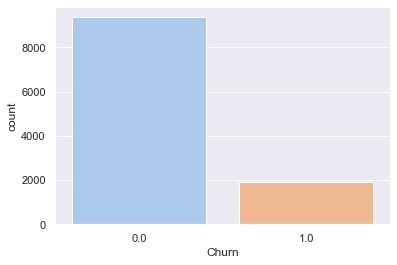

In [131]:
sns.countplot(x='Churn', data=df_new, palette='pastel')


<AxesSubplot:xlabel='City_Tier', ylabel='count'>

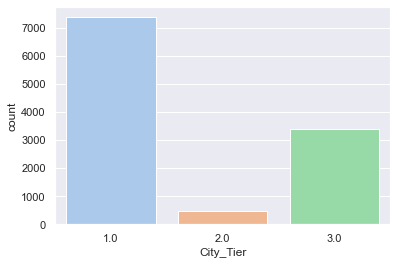

In [132]:
sns.countplot(x='City_Tier', data=df_new, palette='pastel')


<AxesSubplot:xlabel='Complain_ly', ylabel='count'>

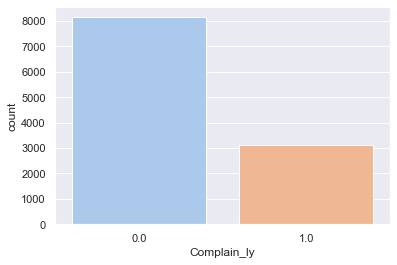

In [133]:
sns.countplot(x='Complain_ly', data=df_new, palette='pastel')


<AxesSubplot:xlabel='Payment', ylabel='count'>

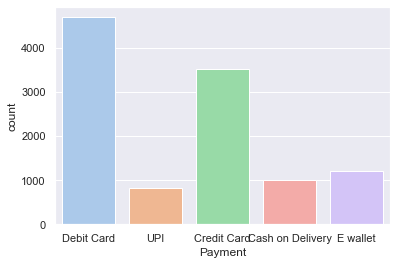

In [134]:
sns.countplot(x='Payment', data=df_new, palette='pastel')


<AxesSubplot:xlabel='Gender', ylabel='count'>

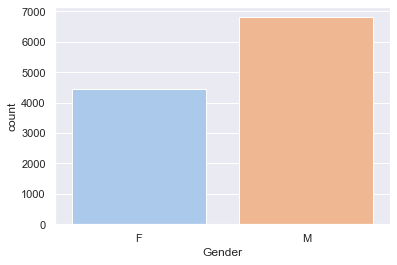

In [135]:
sns.countplot(x='Gender', data=df_new, palette='pastel')


<AxesSubplot:xlabel='account_segment', ylabel='count'>

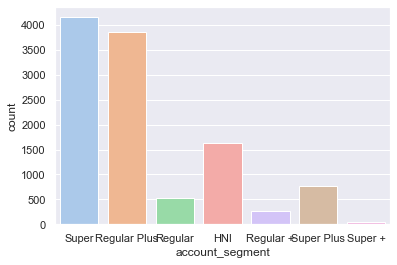

In [136]:
sns.countplot(x='account_segment', data=df_new, palette='pastel')


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

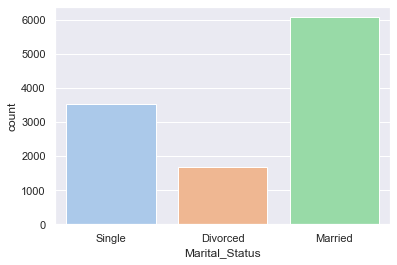

In [137]:
sns.countplot(x='Marital_Status', data=df_new, palette='pastel')


<AxesSubplot:xlabel='Login_device', ylabel='count'>

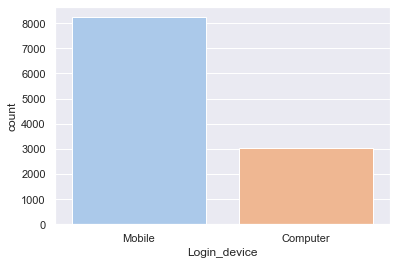

In [138]:
sns.countplot(x='Login_device', data=df_new, palette='pastel')


Bivariate Analysis


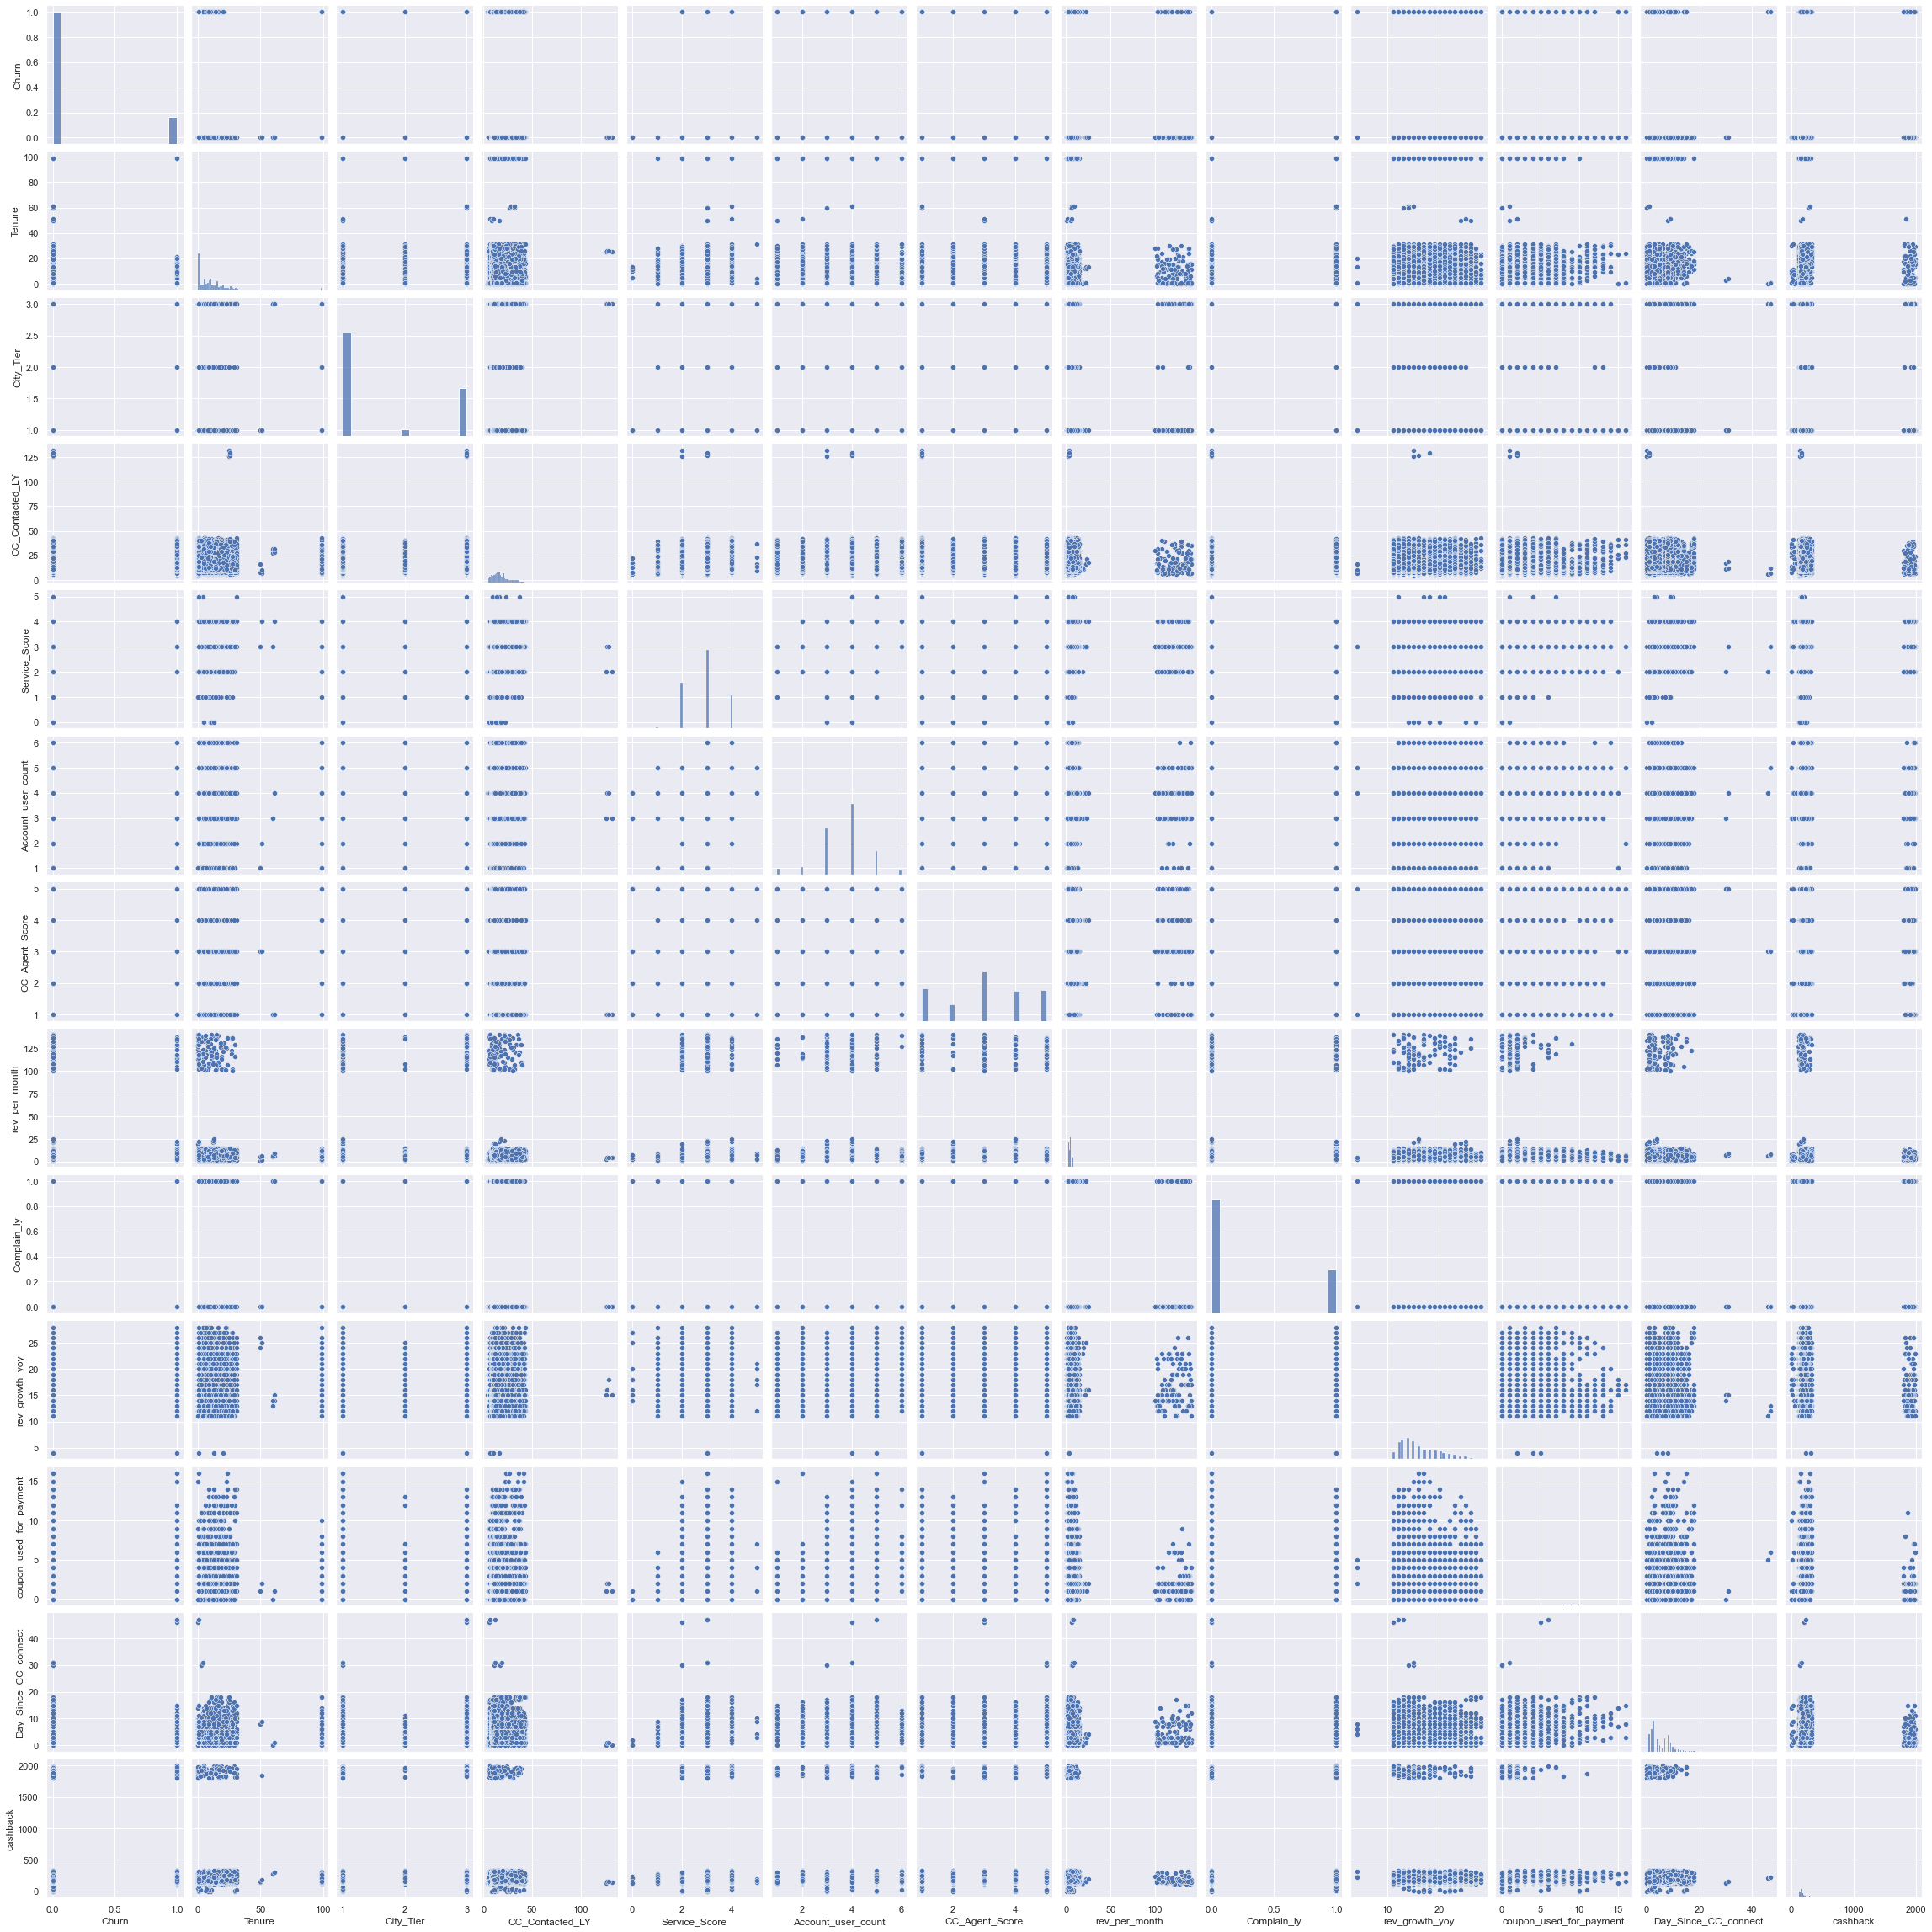

In [139]:
sns.pairplot(df_new)


Churn vs Day_Since_CC_Connect
Churn vs cashback
CC_Contacted_LY vs rev_growth_yoy(customers who have contacted the customer care for atmost 50 times have more revenue growth percentage)
rev_growth_yoy vs Day_Since_CC_Connect
rev_per_month vs CC_Contacted_LY

Numeric vs Numeric


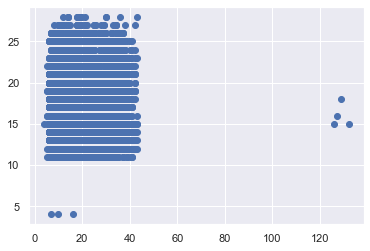

In [140]:
plt.scatter(df_new['CC_Contacted_LY'],df['rev_growth_yoy'])


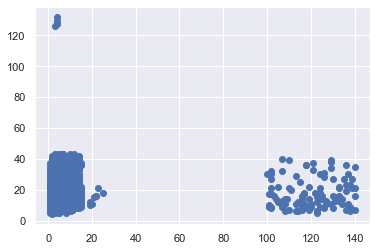

In [141]:
plt.scatter(df_new['rev_per_month'],df_new['CC_Contacted_LY'])


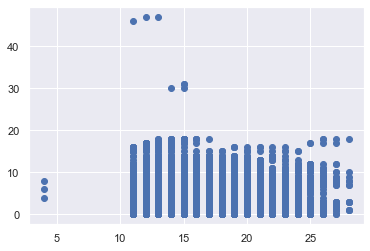

In [142]:
plt.scatter(df_new['rev_growth_yoy'],df_new['Day_Since_CC_connect'])


Categorical vs Categorical

<AxesSubplot:xlabel='Complain_ly', ylabel='count'>

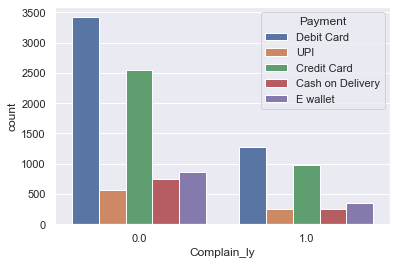

In [143]:
sns.countplot(x='Complain_ly', hue='Payment', data=df_new)


<AxesSubplot:xlabel='Gender', ylabel='count'>

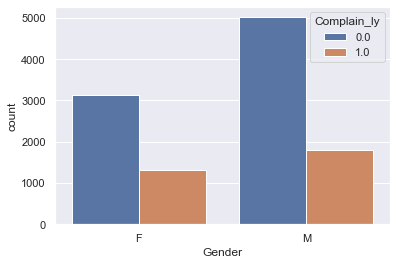

In [144]:

sns.countplot(x='Gender', hue='Complain_ly', data=df_new)


In [145]:
pd.crosstab(df_new['Gender'], df_new['Marital_Status'], margins=True, normalize = True)


Marital_Status,Divorced,Married,Single,All
Gender,,,,
F,0.060213,0.203464,0.131350,0.395027
M,0.087922,0.335790,0.181261,0.604973
All,0.148135,0.539254,0.312611,1.000000


Categorical vs Numeric

<AxesSubplot:xlabel='Churn', ylabel='Day_Since_CC_connect'>

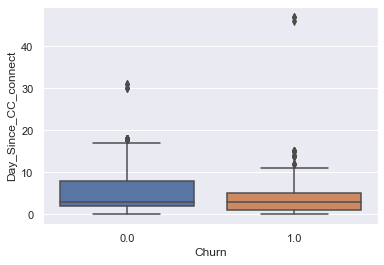

In [146]:
fig_dims = (12, 5)
sns.boxplot(x='Churn', y='Day_Since_CC_connect', data=df_new)


Multivariate Analysis

<AxesSubplot:xlabel='Churn', ylabel='Day_Since_CC_connect'>

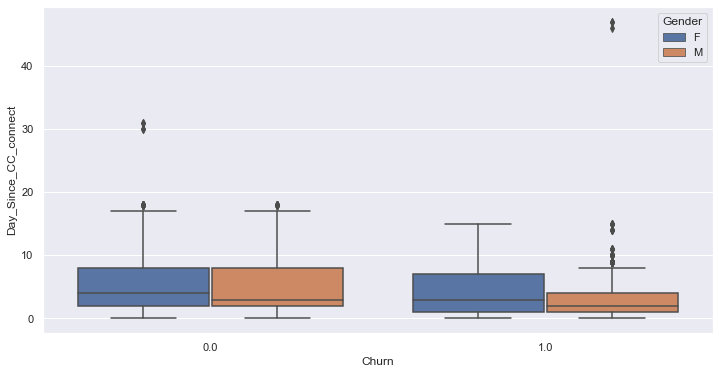

In [147]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Churn', y='Day_Since_CC_connect', hue='Gender',data=df_new)

In [148]:
df_new

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment,Gender,account_segment,Marital_Status,Login_device
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93,Debit Card,F,Super,Single,Mobile
1,1.0,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90,UPI,M,Regular Plus,Single,Mobile
2,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,165.25,Debit Card,M,Regular Plus,Single,Mobile
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07,Debit Card,M,Super,Single,Mobile
4,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60,Credit Card,M,Regular Plus,Single,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0.0,10.0,1.0,34.0,3.0,2.0,1.0,9.0,0.0,19.0,1.0,4.0,153.71,Credit Card,M,Super,Married,Computer
11256,0.0,13.0,1.0,19.0,3.0,5.0,5.0,7.0,0.0,16.0,1.0,8.0,226.91,Credit Card,M,HNI,Married,Mobile
11257,0.0,1.0,1.0,14.0,3.0,2.0,4.0,7.0,1.0,22.0,1.0,4.0,191.42,Debit Card,M,Super,Married,Mobile
11258,0.0,23.0,3.0,11.0,4.0,5.0,4.0,7.0,0.0,16.0,2.0,9.0,179.90,Credit Card,M,Super,Married,Computer


For implementing Decision tree we have to ensure that all the features of the dataset has to be of the datatypes integer or float. Decision tree doesn't support object datatypes. Hence now we covert all the datatypes to int or float.

In [149]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in df_new.columns: 
    if df_new[feature].dtype == 'object': 
        df_new[feature] = pd.Categorical(df_new[feature]).codes

In [150]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Service_Score            11260 non-null  float64
 5   Account_user_count       11260 non-null  float64
 6   CC_Agent_Score           11260 non-null  float64
 7   rev_per_month            11260 non-null  float64
 8   Complain_ly              11260 non-null  float64
 9   rev_growth_yoy           11260 non-null  float64
 10  coupon_used_for_payment  11260 non-null  float64
 11  Day_Since_CC_connect     11260 non-null  float64
 12  cashback                 11260 non-null  float64
 13  Payment                  11260 non-null  int8   
 14  Gender                

In [151]:
df_new.Churn

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11255    0.0
11256    0.0
11257    0.0
11258    0.0
11259    0.0
Name: Churn, Length: 11260, dtype: float64

<AxesSubplot:xlabel='Churn'>

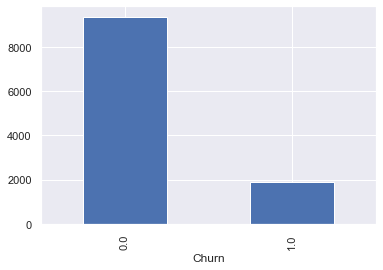

In [152]:
df_new.pivot_table(index='Churn', aggfunc='size').plot(kind='bar')

This is a clear instance of class imbalance. This requires the treatment of Smote to bring in balance in data

In [153]:
# capture the target column ("default") into separate vectors for training set and test set

X = df_new.drop("Churn" , axis=1)

y = df_new.pop("Churn")

In [154]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11255    0.0
11256    0.0
11257    0.0
11258    0.0
11259    0.0
Name: Churn, Length: 11260, dtype: float64

Since there is class imbalance in churn, we must ensure that while splitting the dataset into train and test variables,the proportion of Churn in the train and test sets remain the same as in the original dataset. "Stratify" is used for the same.

In [155]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=11,stratify=y)

<AxesSubplot:title={'center':'Verify that class distributuion in train is same as input data'}, xlabel='Churn'>

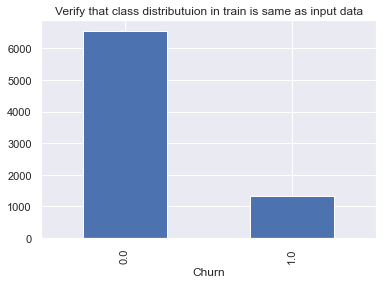

In [156]:
train_verify = pd.DataFrame()

train_verify["Churn"]=train_labels

train_verify.pivot_table(index='Churn', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in train is same as input data')


The class imbalance in the train set is similar to that of the original dataset. Checking for the same in test data set.


<AxesSubplot:title={'center':'Verify that class distributuion in test is same as input data'}, xlabel='Churn'>

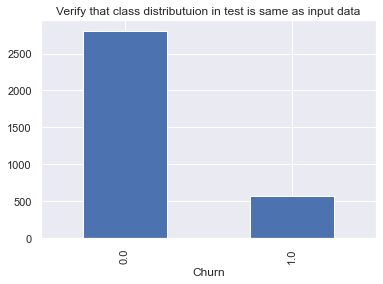

In [157]:
test_verify = pd.DataFrame()

test_verify["Churn"]=test_labels

test_verify.pivot_table(index='Churn', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in test is same as input data')


The class imbalance in the test set is similar to that of the original dataset.


In [158]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 11)
X_train, train_labels = smote.fit_resample(X_train, train_labels)


# Decision Tree Classifier

In [159]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'gini' )
dt_model.fit(X_train, train_labels)


DecisionTreeClassifier()

In [160]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree3.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


FileNotFoundError: [Errno 2] No such file or directory: 'd:\\credit_tree3.dot'

In [161]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                              Imp
Tenure                   0.395005
City_Tier                0.040746
CC_Contacted_LY          0.031000
Service_Score            0.012220
Account_user_count       0.028700
CC_Agent_Score           0.059375
rev_per_month            0.038018
Complain_ly              0.147490
rev_growth_yoy           0.036518
coupon_used_for_payment  0.016573
Day_Since_CC_connect     0.044126
cashback                 0.036443
Payment                  0.027460
Gender                   0.010299
account_segment          0.038591
Marital_Status           0.014996
Login_device             0.022440


In [162]:
from sklearn.metrics import classification_report,confusion_matrix


In [163]:
ytest_predict = dt_model.predict(X_test)

In [164]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(train_labels, ytrain_predict))


NameError: name 'ytrain_predict' is not defined

In [165]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_labels, ytest_predict))


              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      2809
         1.0       0.79      0.84      0.81       569

    accuracy                           0.93      3378
   macro avg       0.88      0.90      0.89      3378
weighted avg       0.94      0.93      0.94      3378



In [168]:
type(test_labels)

pandas.core.series.Series

In [169]:
type(ytest_predict)

numpy.ndarray

In [166]:
len(ytest_predict)

3378

In [167]:
X_test.shape

(3378, 17)

This produces a heavily branched tree. We have to prune the tree by giving parameters.

In [453]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=15,min_samples_split=25)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=15, min_samples_split=25)

In [454]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

In [455]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                              Imp
Tenure                   0.400393
City_Tier                0.041480
CC_Contacted_LY          0.038963
Service_Score            0.010488
Account_user_count       0.023403
CC_Agent_Score           0.064956
rev_per_month            0.035154
Complain_ly              0.134438
rev_growth_yoy           0.040438
coupon_used_for_payment  0.015573
Day_Since_CC_connect     0.045090
cashback                 0.040724
Payment                  0.023962
Gender                   0.009188
account_segment          0.040269
Marital_Status           0.017715
Login_device             0.017767


Accuracy_Training Data(Decision Tree without pruning)

In [456]:
dt_model.score(X_train, train_labels)


1.0

Accuracy_Testing Data(Decision Tree without pruning)

In [457]:
dt_model.score(X_test, test_labels)


0.9298401420959147

In [458]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [459]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(train_labels, ytrain_predict))


              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90      6555
         1.0       0.92      0.87      0.89      6555

    accuracy                           0.89     13110
   macro avg       0.90      0.89      0.89     13110
weighted avg       0.90      0.89      0.89     13110



In [460]:
print(classification_report(test_labels, ytest_predict))


              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      2809
         1.0       0.63      0.75      0.68       569

    accuracy                           0.88      3378
   macro avg       0.79      0.83      0.81      3378
weighted avg       0.89      0.88      0.89      3378



Confusion Matrix_Training Prediction(Decision Tree)

In [461]:
confusion_matrix(train_labels,ytrain_predict)


array([[6049,  506],
       [ 873, 5682]], dtype=int64)

Confusion Matrix_Testing Prediction(Decision Tree)

In [462]:
confusion_matrix(test_labels,ytest_predict)


array([[2559,  250],
       [ 143,  426]], dtype=int64)

Accuracy_Training Data(Decision Tree_After pruning)


In [463]:
reg_dt_model.score(X_train,train_labels)


0.8948131197559115

Accuracy_Testing Data(Decision Tree_After pruning)

In [464]:
reg_dt_model.score(X_test,test_labels)


0.8836589698046181

In [465]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                              Imp
Tenure                   0.519833
City_Tier                0.041589
CC_Contacted_LY          0.017091
Service_Score            0.000220
Account_user_count       0.014337
CC_Agent_Score           0.058204
rev_per_month            0.020381
Complain_ly              0.194221
rev_growth_yoy           0.011243
coupon_used_for_payment  0.013822
Day_Since_CC_connect     0.029537
cashback                 0.005455
Payment                  0.004352
Gender                   0.004438
account_segment          0.045735
Marital_Status           0.011424
Login_device             0.008120


Now we will build a Random Forest model. Random Forest model is an ensemble teachnique that relies on the wisedom of the crowd. Numnerous base models will be built. These base models are not correlated to each other. They are weak classifiers by themselves. Each of these base classifiers use a different set of variables for prediction. Ultimately are the predictions of the base classifiers are combined to generate one single prediction.

Bootstrpped datasets are built from the original dataset where each of these bootstrpped datasets are used to build a unique 
classifier. Bootstrapped datasets are generated by using "random sampling with replacement" so as to esure that the rows in every dataset are unique.


In this dataset there are 19 features. So, while building a bootstrapped adatsets here, apart from implementing "random sampling with replacement" in the rows, columns are also randomly selected for each decision tree and using Gini computations the best variable among the randomly selected variables is determined for the splitting criterion

# Ensemble RandomForest Classifier


In [466]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 501,oob_score=True)
rfcl = rfcl.fit(X_train, train_labels)


In [467]:
rfcl.oob_score_

0.9848970251716247

In [469]:
ytest_predict = rfcl.predict(X_test)


In [470]:
print(classification_report(train_labels,ytrain_predict))


              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90      6555
         1.0       0.92      0.87      0.89      6555

    accuracy                           0.89     13110
   macro avg       0.90      0.89      0.89     13110
weighted avg       0.90      0.89      0.89     13110



In [471]:
print(classification_report(test_labels,ytest_predict))


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2809
         1.0       0.91      0.89      0.90       569

    accuracy                           0.97      3378
   macro avg       0.95      0.94      0.94      3378
weighted avg       0.97      0.97      0.97      3378



The out of bag score for this paticular model is 98%. This is score rate or accuracy rate. Error rate is 100-98 = 2%

In [248]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 15],
    'max_features': [5, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [201, 301]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [249]:
grid_search.fit(X_train, train_labels)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15], 'max_features': [5, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [201, 301]})

In [250]:
grid_search.best_params_


{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [251]:
best_grid = grid_search.best_estimator_


In [252]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)


In [253]:
print(classification_report(train_labels,ytrain_predict))


              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      6555
         1.0       0.92      0.89      0.90      6555

    accuracy                           0.91     13110
   macro avg       0.91      0.91      0.91     13110
weighted avg       0.91      0.91      0.91     13110



In [254]:
print(classification_report(test_labels,ytest_predict))


              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      2809
         1.0       0.65      0.79      0.71       569

    accuracy                           0.89      3378
   macro avg       0.80      0.85      0.82      3378
weighted avg       0.90      0.89      0.90      3378



Accuracy_Training Data(Random Forest)

In [255]:
best_grid.score(X_train,train_labels)


0.905949656750572

Accuracy_Testing Data(Random Forest)

In [256]:
best_grid.score(X_test,test_labels)


0.8919478981645944

Confusion Matrix_Training Prediction(Random Forest)

In [257]:
confusion_matrix(train_labels,ytrain_predict)


array([[6022,  533],
       [ 700, 5855]], dtype=int64)

Confusion Matrix_Testing Prediction(Random Forest)

In [258]:
confusion_matrix(test_labels,ytest_predict)


array([[2566,  243],
       [ 122,  447]], dtype=int64)

In [259]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns))


                              Imp
Tenure                   0.431927
City_Tier                0.053336
CC_Contacted_LY          0.010512
Service_Score            0.004135
Account_user_count       0.017958
CC_Agent_Score           0.046464
rev_per_month            0.031614
Complain_ly              0.227360
rev_growth_yoy           0.007905
coupon_used_for_payment  0.011885
Day_Since_CC_connect     0.040844
cashback                 0.018899
Payment                  0.006341
Gender                   0.002383
account_segment          0.070788
Marital_Status           0.005396
Login_device             0.012253


# Logistic Regression

In [497]:
from sklearn.linear_model import LogisticRegression


In [498]:
model1 = LogisticRegression()
model1.fit(X_train, train_labels)
ytest_predict = model1.predict(X_test)
ytrain_predict = model1.predict(X_train)
print(classification_report(train_labels,ytrain_predict))






              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78      6555
         1.0       0.77      0.83      0.80      6555

    accuracy                           0.79     13110
   macro avg       0.79      0.79      0.79     13110
weighted avg       0.79      0.79      0.79     13110



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [499]:
print(classification_report(test_labels,ytest_predict))


              precision    recall  f1-score   support

         0.0       0.94      0.75      0.84      2809
         1.0       0.39      0.78      0.52       569

    accuracy                           0.76      3378
   macro avg       0.67      0.77      0.68      3378
weighted avg       0.85      0.76      0.78      3378



In [500]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='sag',max_iter=10000,penalty='l2',verbose=True,n_jobs=5)
model.fit(X_train, train_labels)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 3745 epochs took 24 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:   24.0s finished


LogisticRegression(max_iter=10000, n_jobs=5, solver='sag', verbose=True)

In [502]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

Accuracy_Train data

In [503]:
model.score(X_train, train_labels)


0.7909992372234935

Accuracy_Test data

In [504]:
model.score(X_test, test_labels)


0.7634695085849615

Confusion Matrix for Training Data

In [505]:
confusion_matrix(train_labels,ytrain_predict)


array([[4989, 1566],
       [1174, 5381]], dtype=int64)

Confusion Matrix for Testing Data

In [506]:
confusion_matrix(test_labels,ytest_predict)


array([[2142,  667],
       [ 132,  437]], dtype=int64)

In [507]:
print(classification_report(train_labels,ytrain_predict))


              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78      6555
         1.0       0.77      0.82      0.80      6555

    accuracy                           0.79     13110
   macro avg       0.79      0.79      0.79     13110
weighted avg       0.79      0.79      0.79     13110



In [508]:
print(classification_report(test_labels,ytest_predict))



              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84      2809
         1.0       0.40      0.77      0.52       569

    accuracy                           0.76      3378
   macro avg       0.67      0.77      0.68      3378
weighted avg       0.85      0.76      0.79      3378

